In [1]:
#Importing the required libraries for the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
glass=pd.read_csv("glass.csv")

In [3]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
glass.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [6]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
glass.size

2140

In [9]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

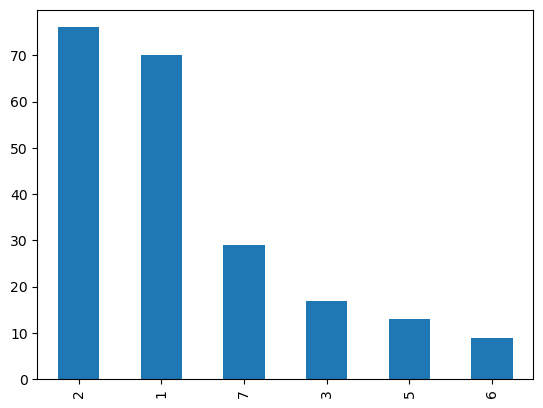

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64


In [10]:
glass["Type"].value_counts(sort=True).plot.bar()
plt.show()
print(glass["Type"].value_counts())

In [11]:
array=glass.values

In [12]:
array

array([[ 1.52101, 13.64   ,  4.49   , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  0.     ,  0.     ,  1.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  1.64   ,  0.     ,  7.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  1.57   ,  0.     ,  7.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  1.67   ,  0.     ,  7.     ]])

In [13]:
x=glass.iloc[:,:9]
y=glass.iloc[:,-1]

In [14]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

#  Grid Search for algorithm tuning

In [16]:
#Grid search for algorithm tuning

num_folds=10
kfold=KFold(n_splits=5)


In [17]:
n_neighbors=np.array(range(1,50))
param_grid=dict(n_neighbors=n_neighbors)


In [18]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [19]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


#  Grid Search for Train Dataset

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
train,test=train_test_split(glass,test_size=0.2,random_state=40)


In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=40)

In [23]:
n_neighbors=np.array(range(1,40))
param_grid=dict(n_neighbors=n_neighbors)


In [24]:
model1=KNeighborsClassifier()
grid1=GridSearchCV(estimator=model1,param_grid=param_grid)
grid1.fit(xtrain,ytrain)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [25]:
print(grid1.best_score_)
print(grid1.best_params_)


0.7186206896551723
{'n_neighbors': 1}


In [26]:
KNN_results1 = cross_val_score(grid1, xtrain, ytrain, cv=kfold)
print(KNN_results1.mean())

0.6443678160919539


In [27]:
KNN_preds1=grid1.predict(xtrain)
pd.crosstab(ytrain,KNN_preds1)

col_0,1,2,3,5,6,7
Type,,,,,,
1,51,0,0,0,0,0
2,0,51,0,0,0,0
3,0,0,9,0,0,0
5,0,0,0,10,0,0
6,0,0,0,0,6,0
7,0,0,0,0,0,22


#  Grid Search on test data

In [28]:
n_neighbors=np.array(range(1,40))
param_grid=dict(n_neighbors=n_neighbors)


In [29]:
model2=KNeighborsClassifier()
grid2=GridSearchCV(estimator=model2,param_grid=param_grid)
grid2.fit(xtest,ytest)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [30]:
print(grid2.best_score_)
print(grid2.best_params_)

0.6615384615384615
{'n_neighbors': 1}


#  Visualising the CV results

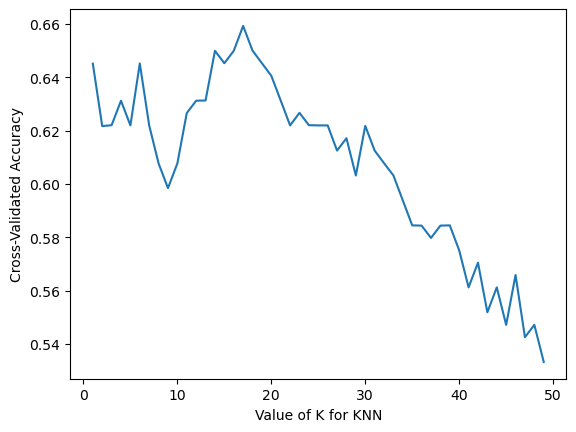

In [31]:
import matplotlib.pyplot as plt

#Choosing the K between  1 to 50

k_range=range(1,50)
k_scores=[]

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=4)
    k_scores.append(scores.mean())
    
#Visualising the plot

plt.plot(k_range,k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.show()

#  Plotting the Testing and Training Accuracy

In [32]:
print(train.shape)

(171, 10)


In [33]:
print(test.shape)

(43, 10)


In [34]:
from sklearn.neighbors import KNeighborsClassifier as KNC


In [35]:
model2=KNeighborsClassifier()
grid2=GridSearchCV(estimator=model2,param_grid=param_grid)
grid2.fit(xtest,ytest)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [36]:
KNN_results2=cross_val_score(grid1,xtest,ytest,cv=kfold)
print(KNN_results2.mean())

0.5846153846153846


In [37]:
KNN_preds2=grid1.predict(xtest)
pd.crosstab(ytest,KNN_preds2)

col_0,1,2,3,5,6,7
Type,,,,,,
1,14,2,3,0,0,0
2,10,14,0,1,0,0
3,5,0,3,0,0,0
5,0,0,0,3,0,0
6,0,1,0,0,2,0
7,0,1,0,0,1,5


In [38]:
accuracy=[]
for i in range(3,50,2):
    neighbour = KNC(n_neighbors=i)
    neighbour.fit(train.iloc[:,:9],train.iloc[:,-1])
    train_acc= np.mean(neighbour.predict(train.iloc[:,:9])==train.iloc[:,-1])
    test_acc= np.mean(neighbour.predict(test.iloc[:,:9])==test.iloc[:,-1])
    accuracy.append([train_acc,test_acc])
print(accuracy)
print(len(accuracy))

[[0.8245614035087719, 0.7674418604651163], [0.7192982456140351, 0.6976744186046512], [0.7134502923976608, 0.6046511627906976], [0.695906432748538, 0.627906976744186], [0.672514619883041, 0.6511627906976745], [0.6549707602339181, 0.627906976744186], [0.6608187134502924, 0.627906976744186], [0.6432748538011696, 0.6511627906976745], [0.6374269005847953, 0.6046511627906976], [0.6491228070175439, 0.5581395348837209], [0.6432748538011696, 0.6046511627906976], [0.6432748538011696, 0.5581395348837209], [0.6374269005847953, 0.5581395348837209], [0.6140350877192983, 0.5348837209302325], [0.631578947368421, 0.5116279069767442], [0.6198830409356725, 0.5116279069767442], [0.6257309941520468, 0.5116279069767442], [0.6198830409356725, 0.5116279069767442], [0.6081871345029239, 0.4883720930232558], [0.6023391812865497, 0.46511627906976744], [0.6023391812865497, 0.4418604651162791], [0.5906432748538012, 0.46511627906976744], [0.5789473684210527, 0.46511627906976744], [0.5847953216374269, 0.4651162790697

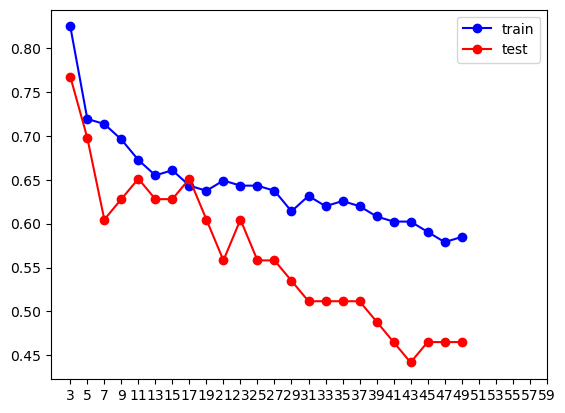

In [39]:
plt.plot(np.arange(3,50,2),[i[0] for i in accuracy],"bo-")
plt.plot(np.arange(3,50,2),[i[1] for i in accuracy],"ro-")
plt.legend(["train","test"])
plt.xticks(np.arange(3,60,2))
plt.show()


#  Selecting the best model

In [40]:
# Model for k=3

neighbour=KNC(n_neighbors=3)


In [41]:
neighbour.fit(train.iloc[:,:9],train.iloc[:,-1])
train_acc= np.mean(neighbour.predict(train.iloc[:,:9])==train.iloc[:,-1])
test_acc= np.mean(neighbour.predict(test.iloc[:,:9])==test.iloc[:,-1])
print("K=3 : ",train_acc,test_acc)

K=3 :  0.8245614035087719 0.7674418604651163


In [42]:
# Model for k=4

neighbour=KNC(n_neighbors=4)

In [43]:
neighbour.fit(train.iloc[:,:9],train.iloc[:,-1])
train_acc= np.mean(neighbour.predict(train.iloc[:,:9])==train.iloc[:,-1])
test_acc= np.mean(neighbour.predict(test.iloc[:,:9])==test.iloc[:,-1])
print("K=4 : ",train_acc,test_acc)
     

K=4 :  0.7660818713450293 0.6744186046511628


In [44]:
# Model for K=8
neighbour=KNC(n_neighbors=8)

In [45]:
neighbour.fit(train.iloc[:,:9],train.iloc[:,-1])
train_acc= np.mean(neighbour.predict(train.iloc[:,:9])==train.iloc[:,-1])
test_acc= np.mean(neighbour.predict(test.iloc[:,:9])==test.iloc[:,-1])
print("K=8 : ",train_acc,test_acc)

K=8 :  0.695906432748538 0.627906976744186


In [46]:
# Model for K=15
neighbour=KNC(n_neighbors=15)

In [47]:
neighbour.fit(train.iloc[:,:9],train.iloc[:,-1])
train_acc= np.mean(neighbour.predict(train.iloc[:,:9])==train.iloc[:,-1])
test_acc= np.mean(neighbour.predict(test.iloc[:,:9])==test.iloc[:,-1])
print("K=15 : ",train_acc,test_acc)

K=15 :  0.6608187134502924 0.627906976744186


In [48]:
# Model for K=18
neighbour=KNC(n_neighbors=18)

In [49]:
neighbour.fit(train.iloc[:,:9],train.iloc[:,-1])
train_acc= np.mean(neighbour.predict(train.iloc[:,:9])==train.iloc[:,-1])
test_acc= np.mean(neighbour.predict(test.iloc[:,:9])==test.iloc[:,-1])
print("K=18 : ",train_acc,test_acc)

K=18 :  0.6549707602339181 0.627906976744186


#  From all the abobe results we can see that, For K = 3 the model gives best accuracy